In [1]:
import pandas as pd
import glob

def load_csv(filename):
    with open(filename, 'r') as file:
        first_line = file.readline()
        if first_line.replace(',', '').strip().isdigit():  # Check if the first line is numeric
            df = pd.read_csv(filename, skiprows=1)  # Skip the first row
        else:
            df = pd.read_csv(filename)
    return df

df = pd.concat(
    [
        load_csv(filename) 
        for filename in glob.glob('*.csv')
    ], 
    ignore_index=True
)
df

# https://towardsdatascience.com/load-multiple-csv-pandas-9c0c88c5adff

datetime  temp  dew  humidity  precip  precipprob  \
0       2010-01-01T00:00:00   1.9 -0.5     84.25   0.417       100.0   
1       2010-01-01T01:00:00   1.9 -0.5     83.90   0.000         0.0   
2       2010-01-01T02:00:00   1.4 -0.7     85.76   0.000         0.0   
3       2010-01-01T03:00:00   1.4 -0.7     85.69   0.000         0.0   
4       2010-01-01T04:00:00   1.3 -0.8     85.72   0.000         0.0   
...                     ...   ...  ...       ...     ...         ...   
122839  2024-01-06T07:00:00   5.1  3.5     89.07     NaN         0.0   
122840  2024-01-06T08:00:00   5.0  3.5     90.24     NaN         0.0   
122841  2024-01-06T09:00:00   4.9  3.9     92.89     NaN         0.0   
122842  2024-01-06T10:00:00   5.9  4.8     92.47     NaN         0.0   
122843  2024-01-06T11:00:00   6.8  4.8     86.98     NaN         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0       rain,snow   0.0        0.0       19.4     11.0             999.9   
1             NaN   0.0        0.0       21.8     19.0             999.8   
2             NaN   0.0        0.0       17.7     10.0            1000.0   
3             NaN   0.0        0.0       18.0     11.0            1000.2   
4             NaN   0.0        0.0       17.4     10.0            1000.5   
...           ...   ...        ...        ...      ...               ...   
122839        NaN   NaN        NaN        9.6    327.0            1013.2   
122840        NaN   NaN        NaN        8.9    320.0            1014.0   
122841        NaN   NaN        NaN        9.6    321.0            1015.0   
122842        NaN   NaN        NaN        7.8    340.0            1016.0   
122843        NaN   NaN        NaN       16.0    349.0            1016.0   

        cloudcover  solarradiation  solarenergy  uvindex  
0             62.2             0.0          0.0      0.0  
1             22.4             0.0          0.0      0.0  
2             38.0             0.0          0.0      0.0  
3             66.7             0.0          0.0      0.0  
4             62.8             0.0          0.0      0.0  
...            ...             ...          ...      ...  
122839        65.1             0.0          0.0      0.0  
122840        89.9             0.0          0.0      0.0  
122841        85.5            23.0          0.1      0.0  
122842        51.7            72.0          0.3      1.0  
122843        29.5           178.0          0.6      2.0  

[122844 rows x 16 columns]

In [2]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          122844 non-null  datetime64[ns]
 1   temp              122590 non-null  float64       
 2   dew               122568 non-null  float64       
 3   humidity          122575 non-null  float64       
 4   precip            122565 non-null  float64       
 5   precipprob        122558 non-null  float64       
 6   preciptype        11277 non-null   object        
 7   snow              89810 non-null   float64       
 8   snowdepth         89279 non-null   float64       
 9   windspeed         122583 non-null  float64       
 10  winddir           122567 non-null  float64       
 11  sealevelpressure  122319 non-null  float64       
 12  cloudcover        122556 non-null  float64       
 13  solarradiation    122514 non-null  float64       
 14  sola

datetime                 0
temp                   254
dew                    276
humidity               269
precip                 279
precipprob             286
preciptype          111567
snow                 33034
snowdepth            33565
windspeed              261
winddir                277
sealevelpressure       525
cloudcover             288
solarradiation         330
solarenergy            364
uvindex                358
dtype: int64

In [3]:
df

datetime  temp  dew  humidity  precip  precipprob  \
0      2010-01-01 00:00:00   1.9 -0.5     84.25   0.417       100.0   
1      2010-01-01 01:00:00   1.9 -0.5     83.90   0.000         0.0   
2      2010-01-01 02:00:00   1.4 -0.7     85.76   0.000         0.0   
3      2010-01-01 03:00:00   1.4 -0.7     85.69   0.000         0.0   
4      2010-01-01 04:00:00   1.3 -0.8     85.72   0.000         0.0   
...                    ...   ...  ...       ...     ...         ...   
122839 2024-01-06 07:00:00   5.1  3.5     89.07     NaN         0.0   
122840 2024-01-06 08:00:00   5.0  3.5     90.24     NaN         0.0   
122841 2024-01-06 09:00:00   4.9  3.9     92.89     NaN         0.0   
122842 2024-01-06 10:00:00   5.9  4.8     92.47     NaN         0.0   
122843 2024-01-06 11:00:00   6.8  4.8     86.98     NaN         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
0       rain,snow   0.0        0.0       19.4     11.0             999.9   
1             NaN   0.0        0.0       21.8     19.0             999.8   
2             NaN   0.0        0.0       17.7     10.0            1000.0   
3             NaN   0.0        0.0       18.0     11.0            1000.2   
4             NaN   0.0        0.0       17.4     10.0            1000.5   
...           ...   ...        ...        ...      ...               ...   
122839        NaN   NaN        NaN        9.6    327.0            1013.2   
122840        NaN   NaN        NaN        8.9    320.0            1014.0   
122841        NaN   NaN        NaN        9.6    321.0            1015.0   
122842        NaN   NaN        NaN        7.8    340.0            1016.0   
122843        NaN   NaN        NaN       16.0    349.0            1016.0   

        cloudcover  solarradiation  solarenergy  uvindex  
0             62.2             0.0          0.0      0.0  
1             22.4             0.0          0.0      0.0  
2             38.0             0.0          0.0      0.0  
3             66.7             0.0          0.0      0.0  
4             62.8             0.0          0.0      0.0  
...            ...             ...          ...      ...  
122839        65.1             0.0          0.0      0.0  
122840        89.9             0.0          0.0      0.0  
122841        85.5            23.0          0.1      0.0  
122842        51.7            72.0          0.3      1.0  
122843        29.5           178.0          0.6      2.0  

[122844 rows x 16 columns]

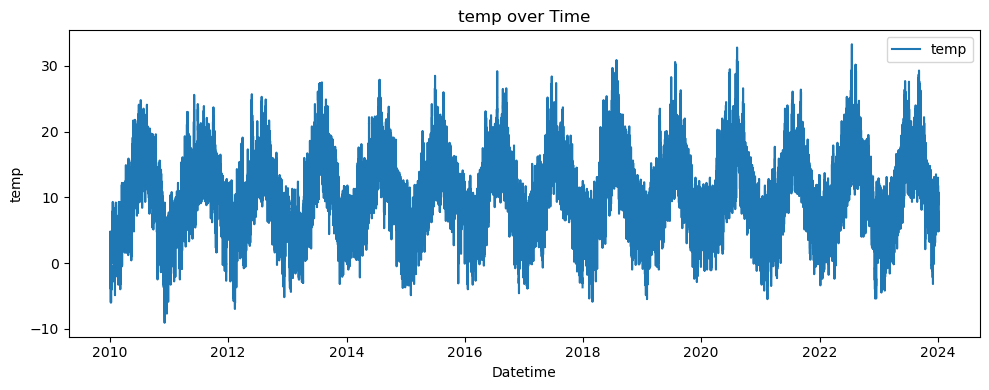

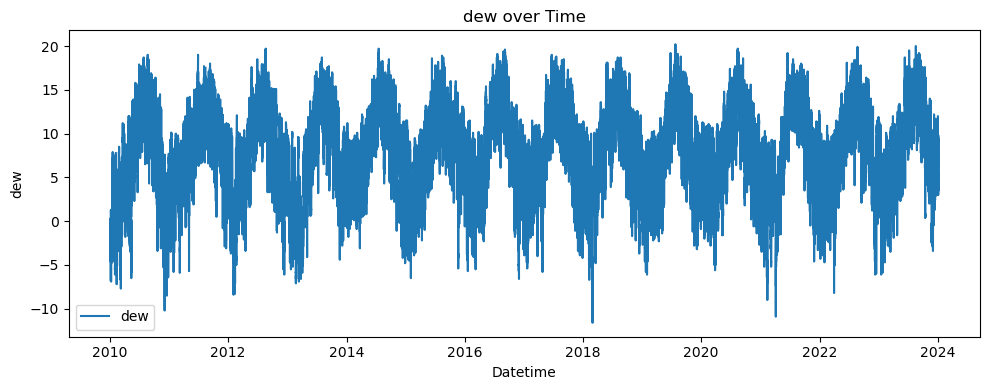

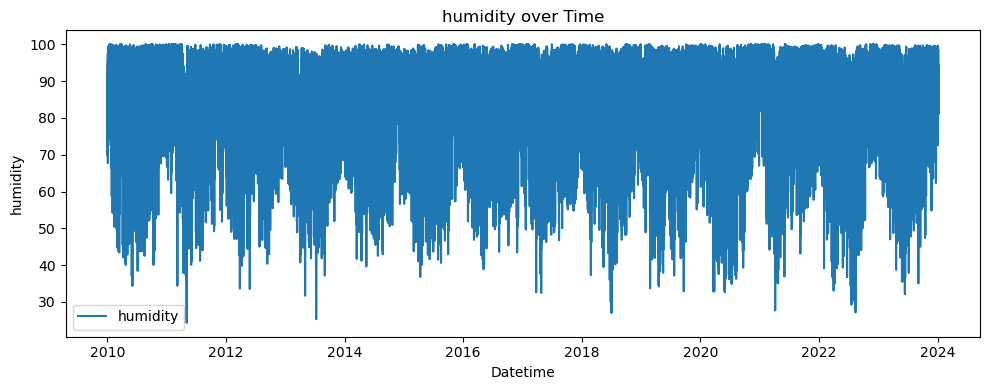

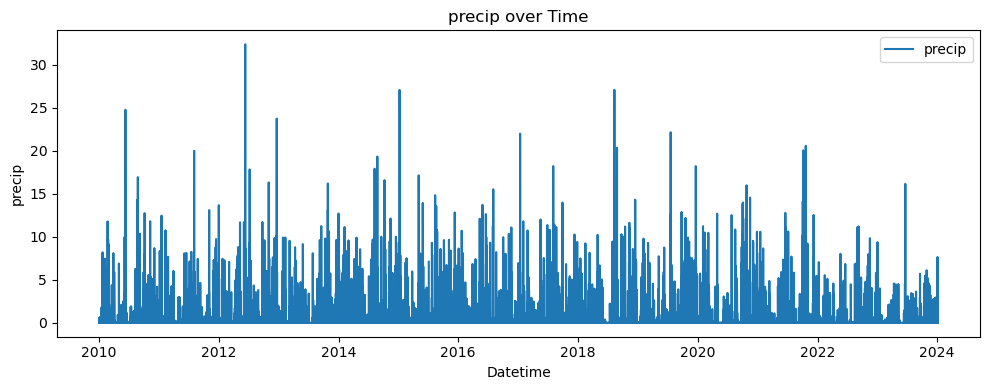

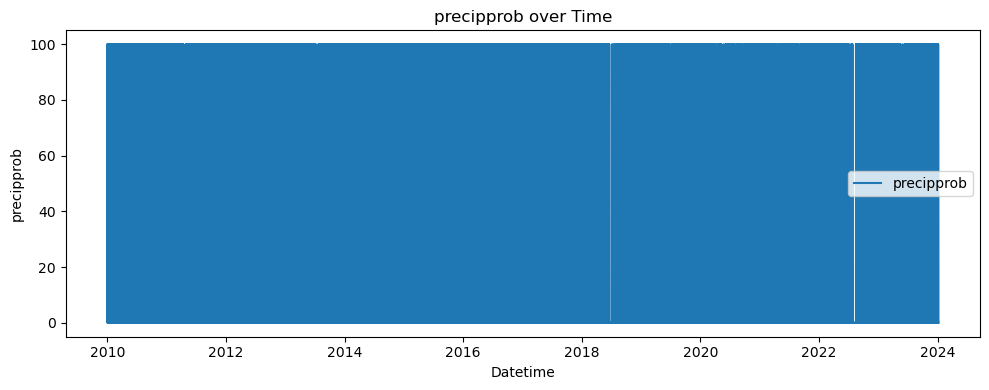

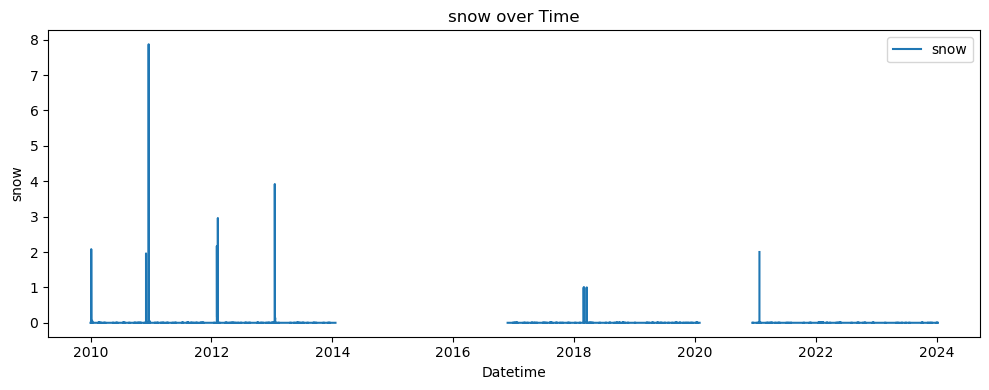

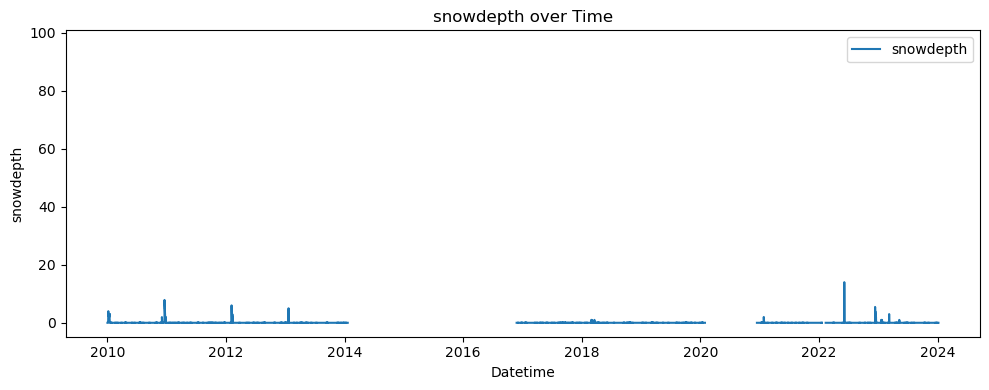

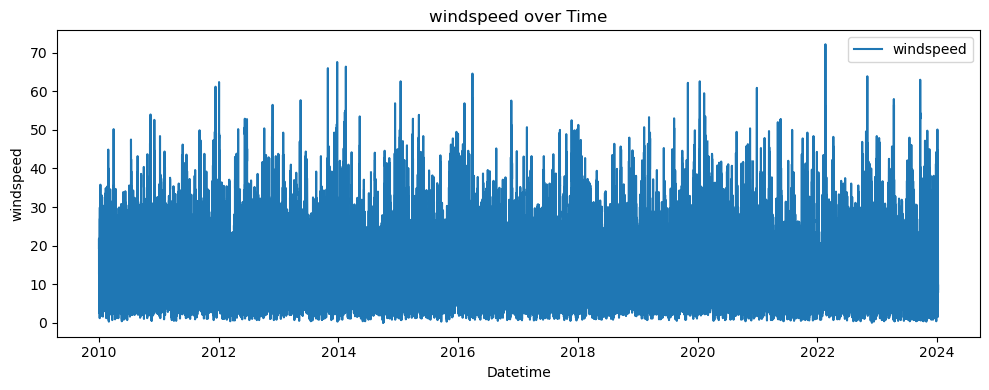

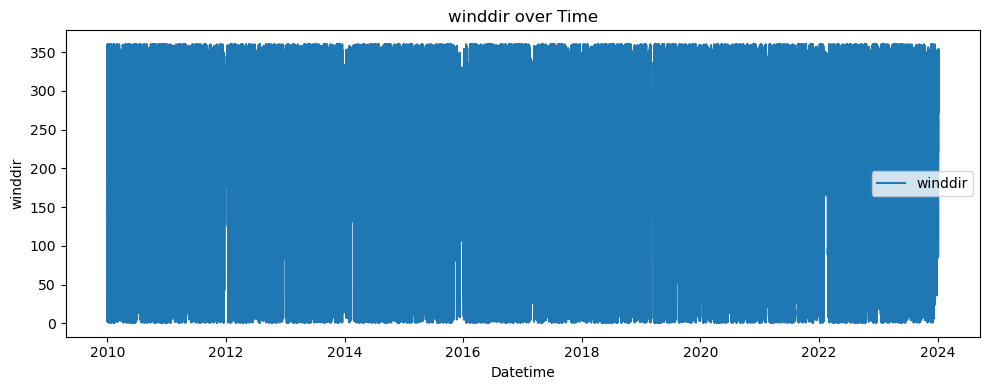

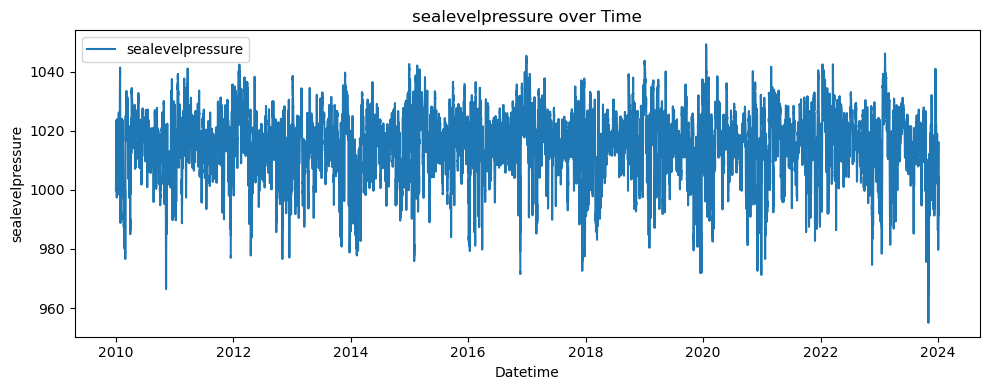

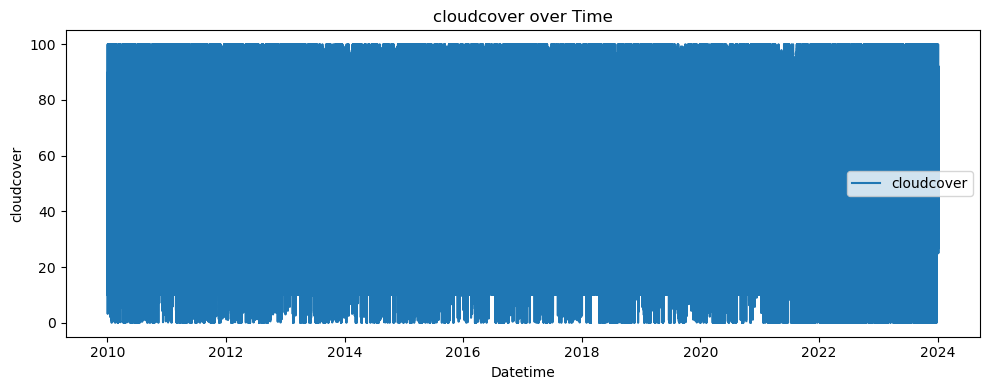

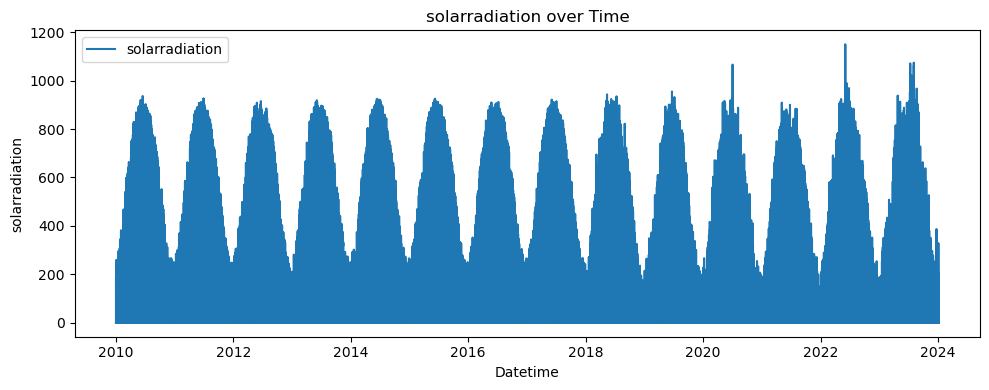

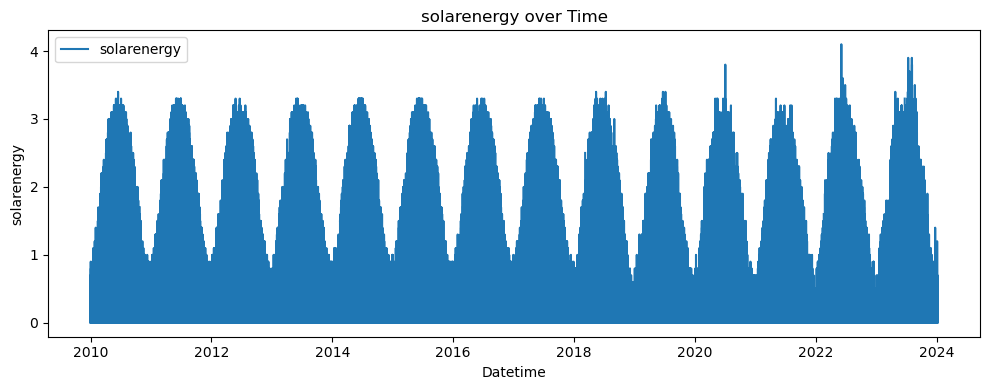

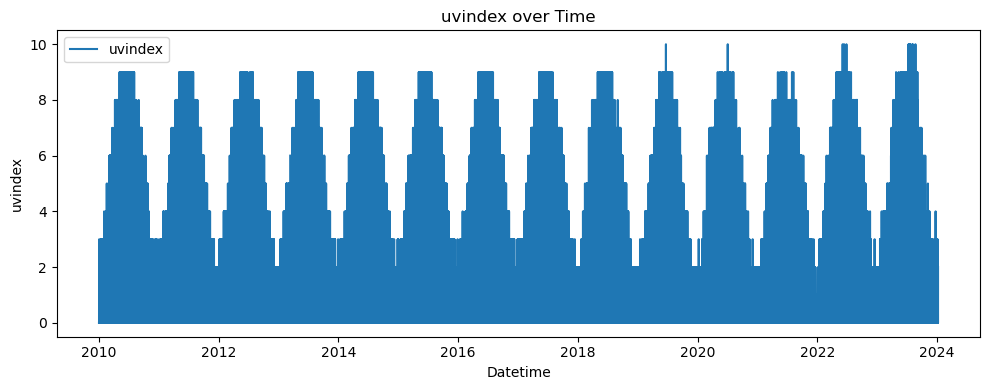

In [4]:
import matplotlib.pyplot as plt
# filtering only numeric columns 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
for column in numeric_df.columns:
    if column != 'datetime':  # excluding the datetime column.
        plt.figure(figsize=(10, 4))  # Setting the figure size for each individual plot.
        plt.plot(df['datetime'], df[column], label=column)
        plt.title(f'{column} over Time')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.legend()
        plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap.
        plt.show()


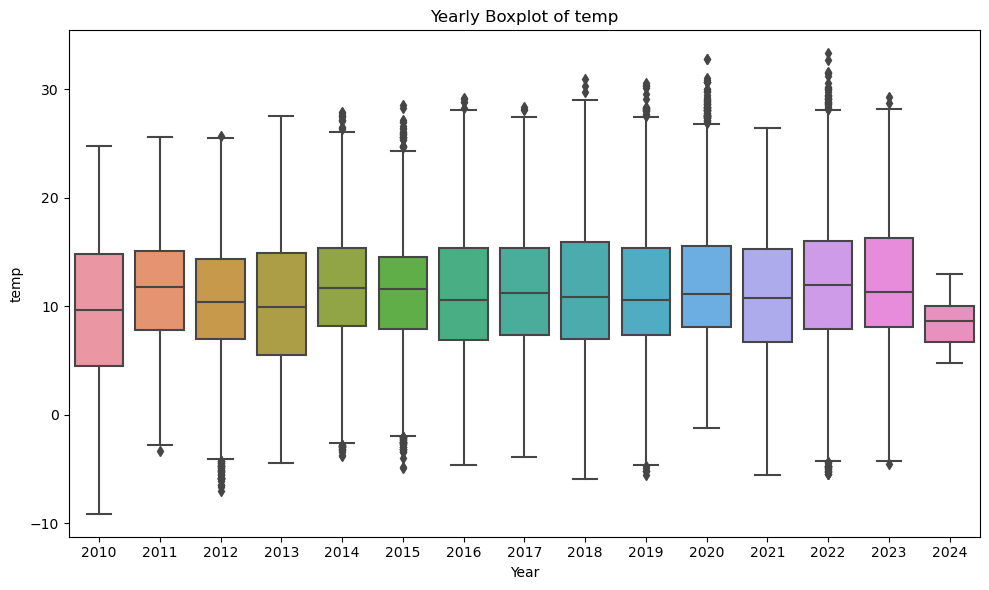

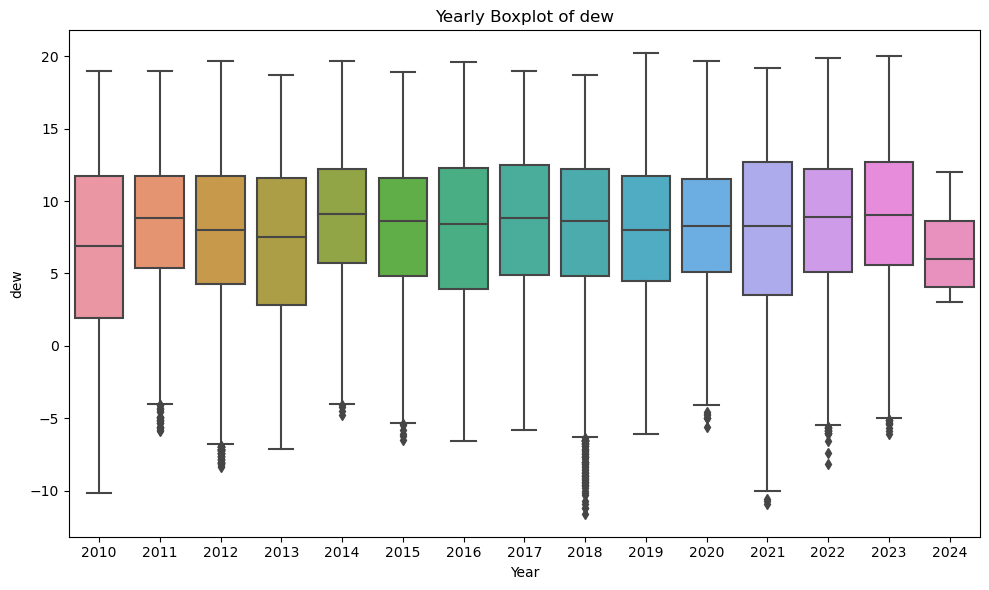

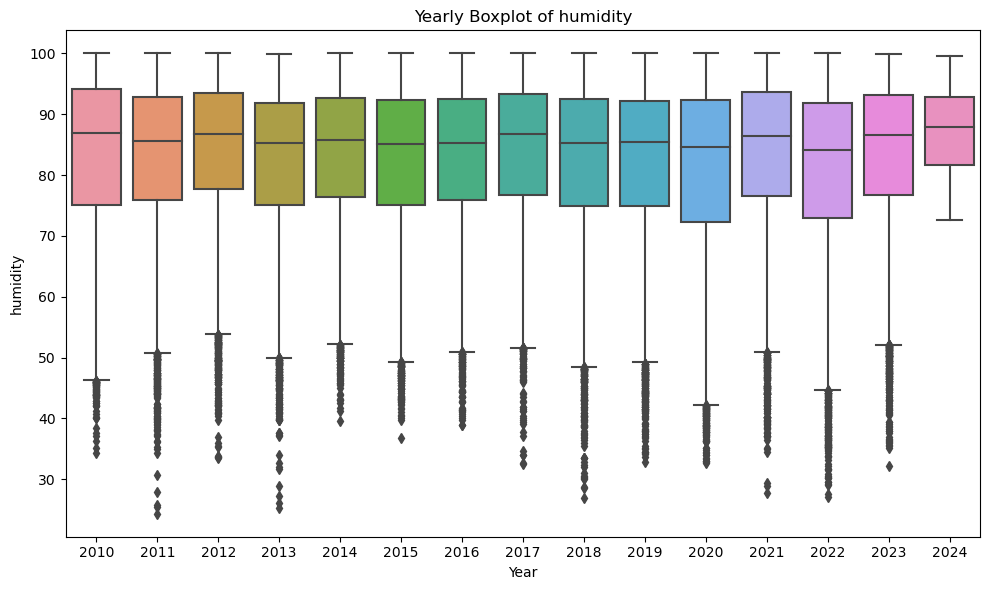

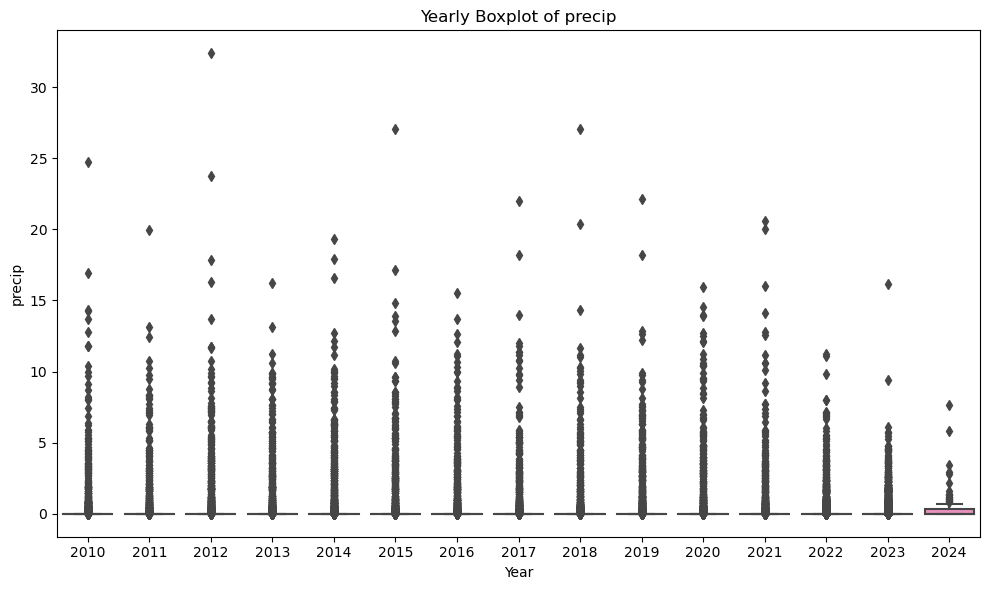

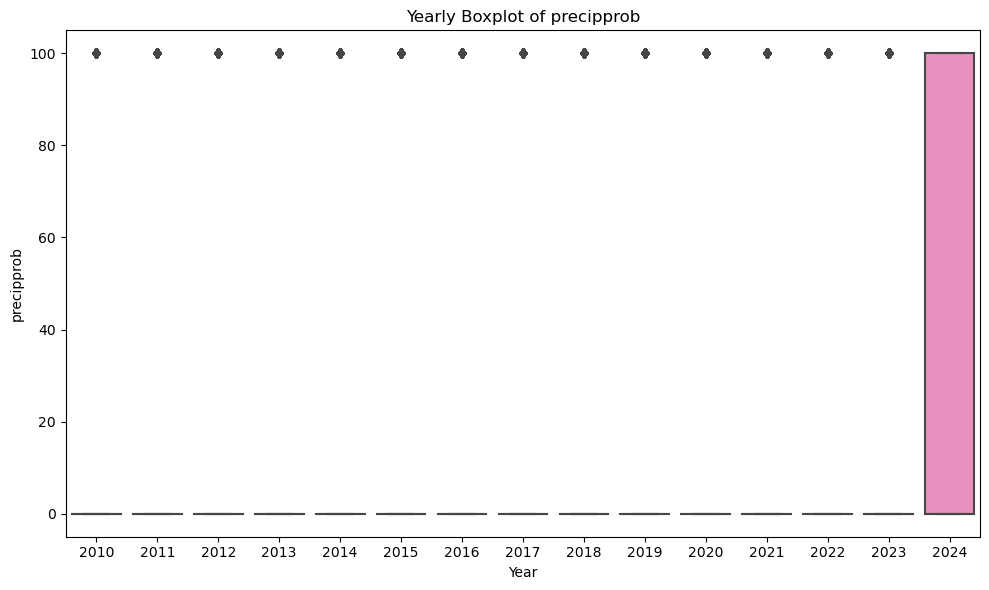

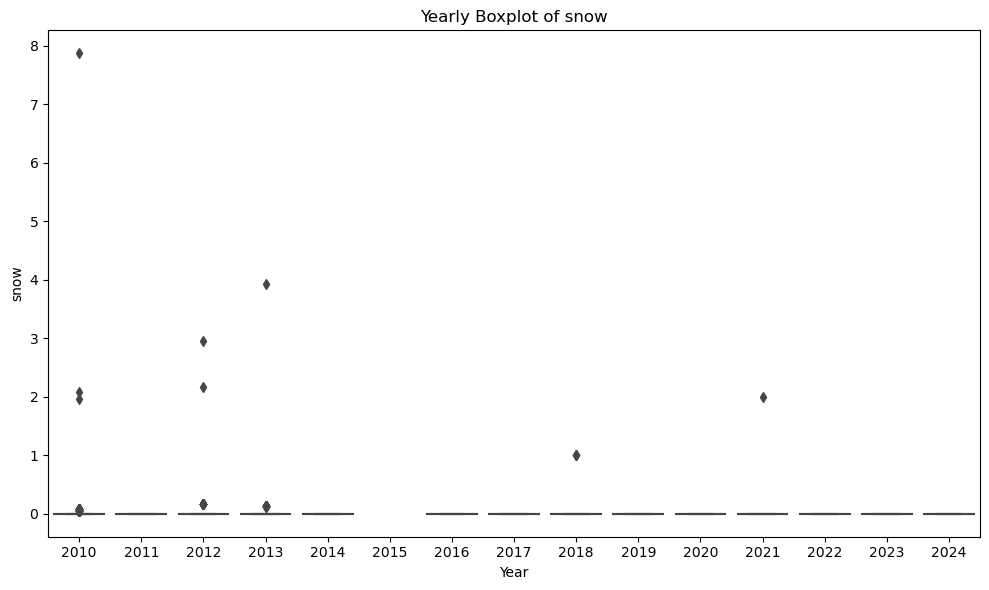

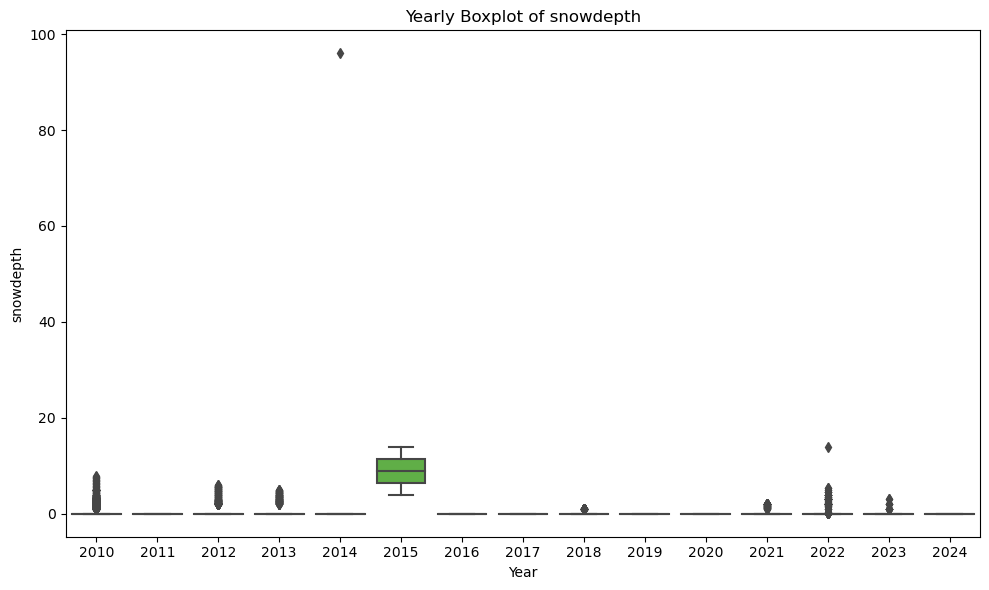

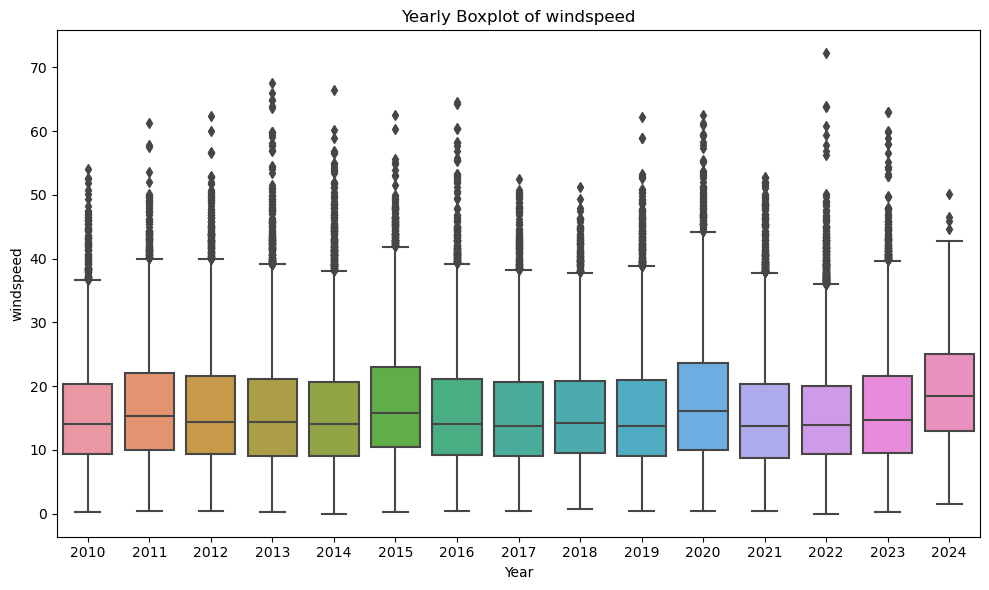

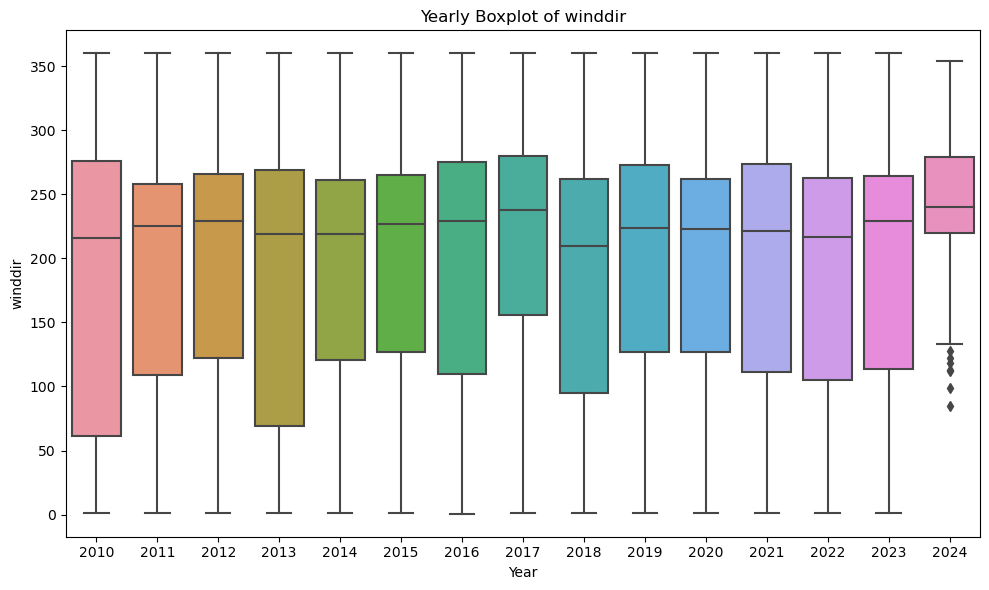

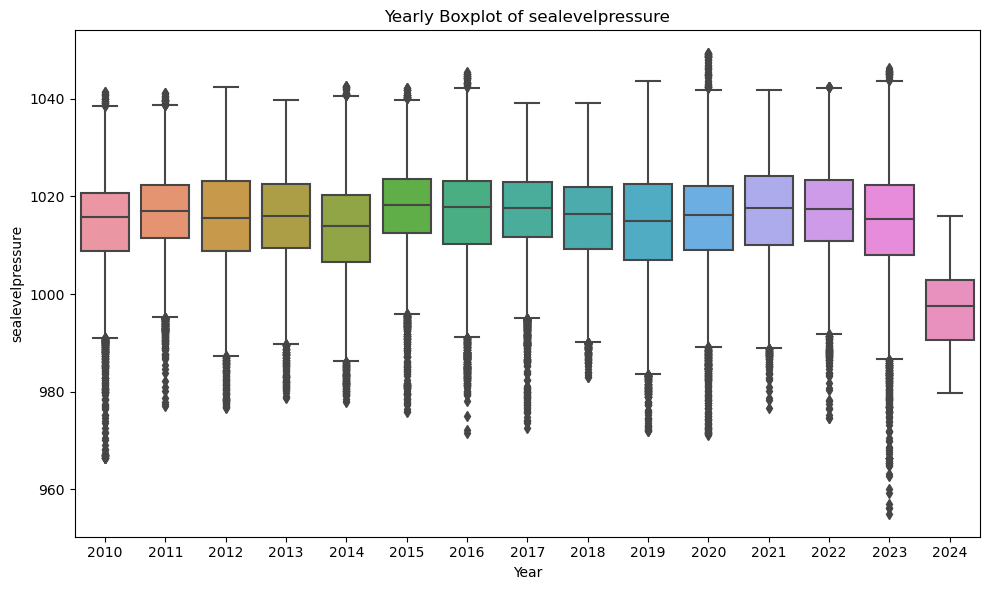

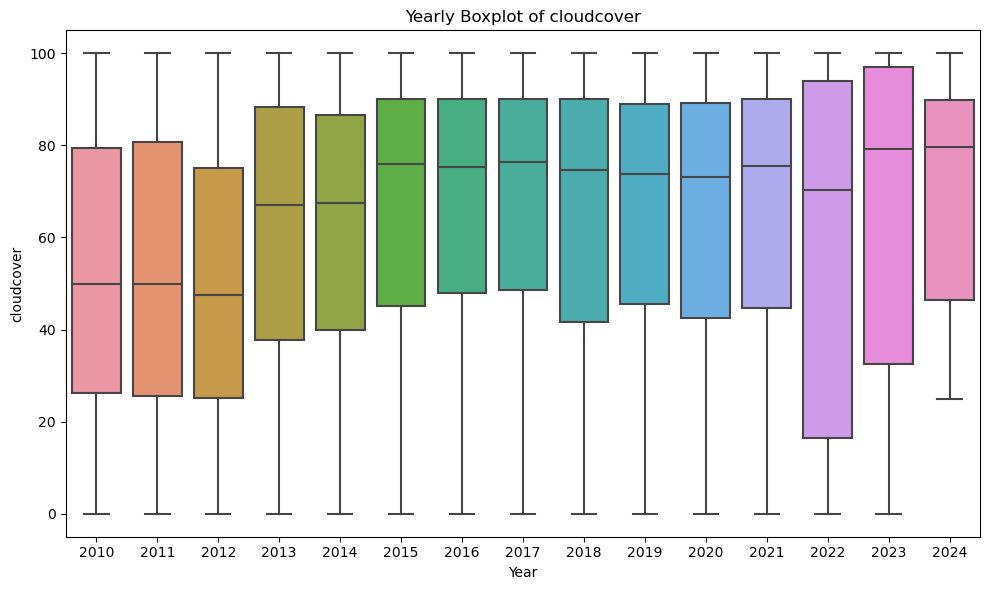

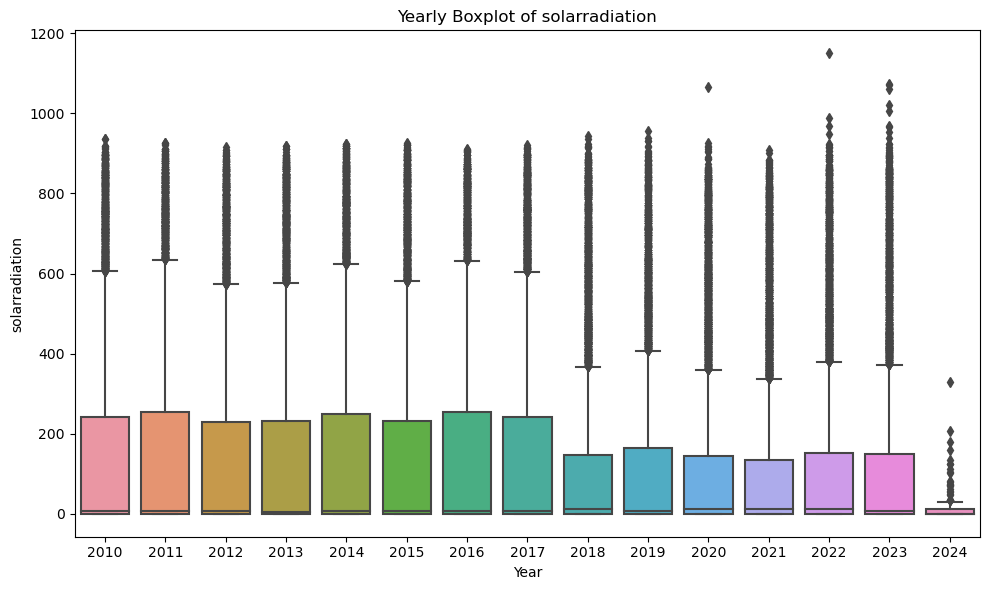

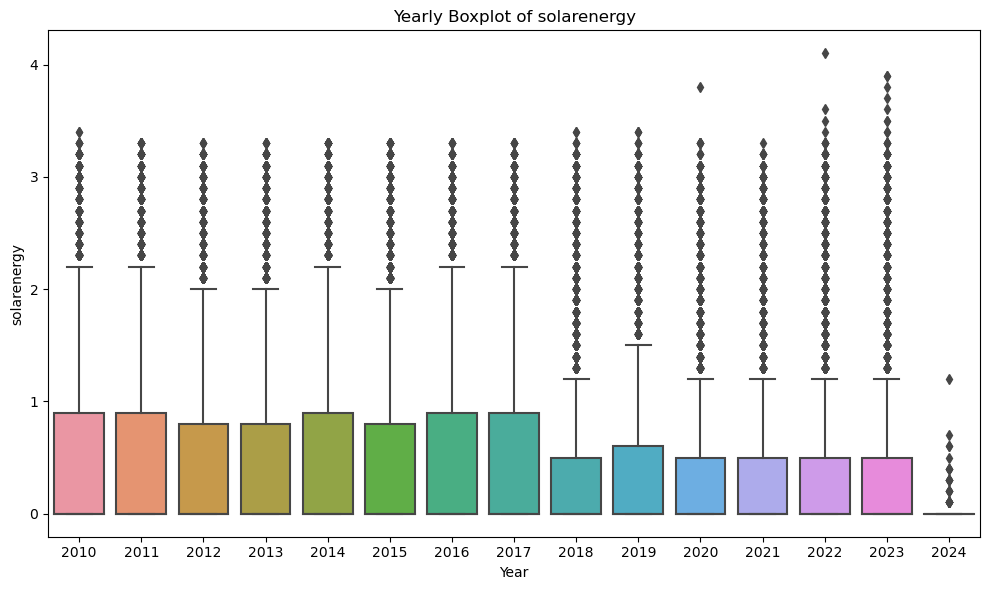

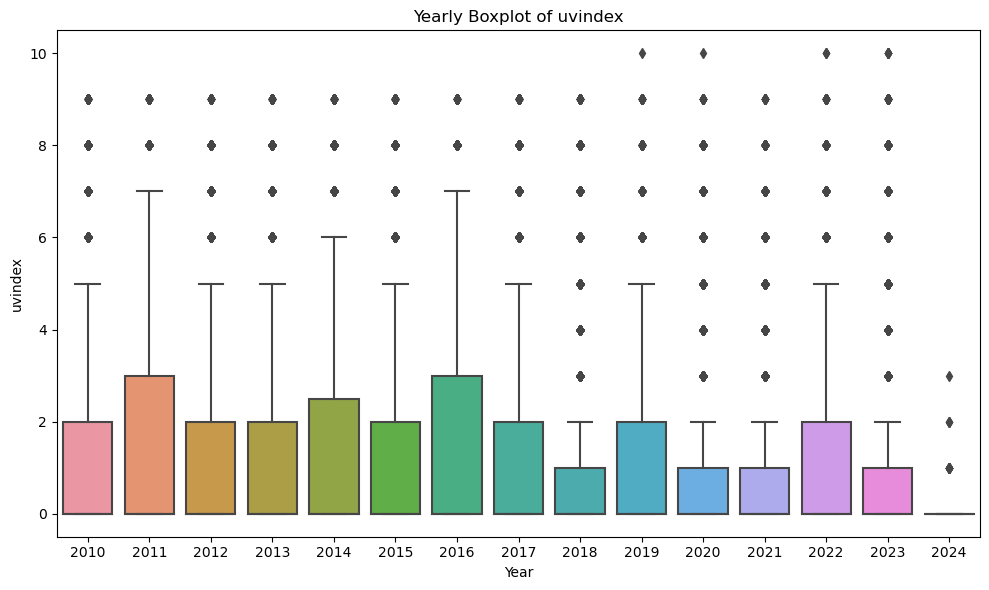

In [5]:
import seaborn as sns
# Group by year
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
#create a boxplot for each year
for column in numeric_df.columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=df, x='year', y=column)
    plt.title(f'Yearly Boxplot of {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.tight_layout()  
    plt.show()


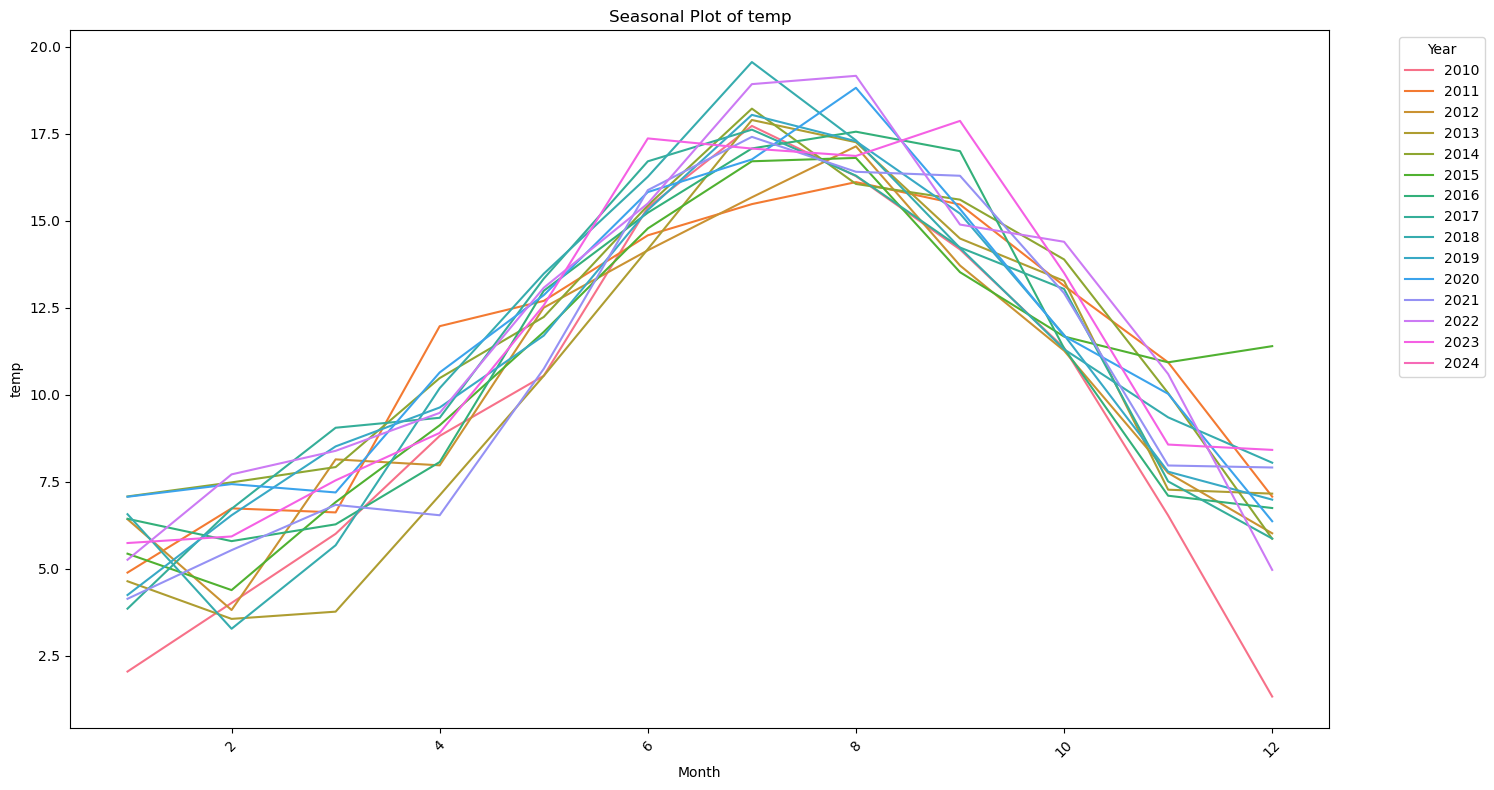

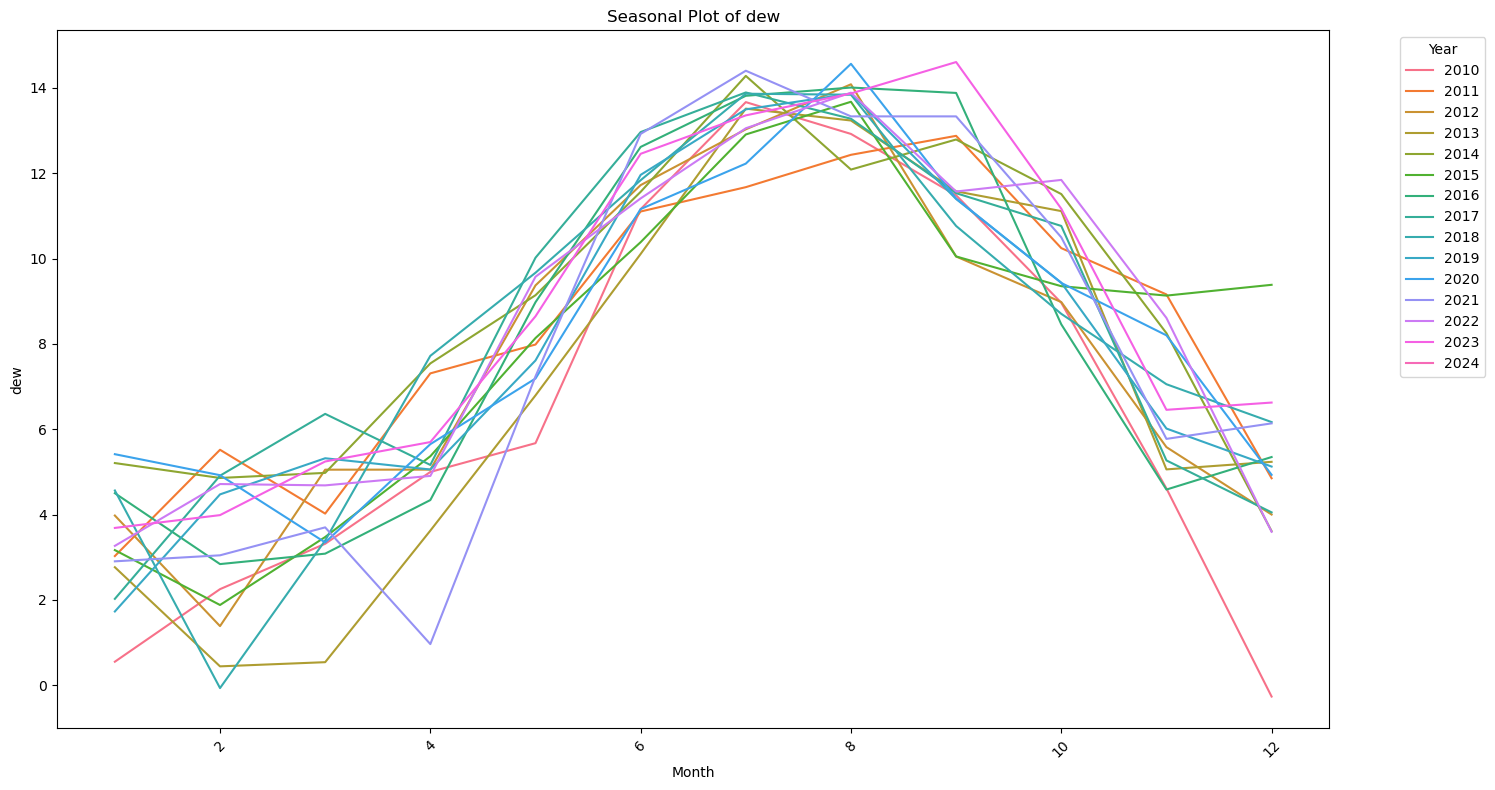

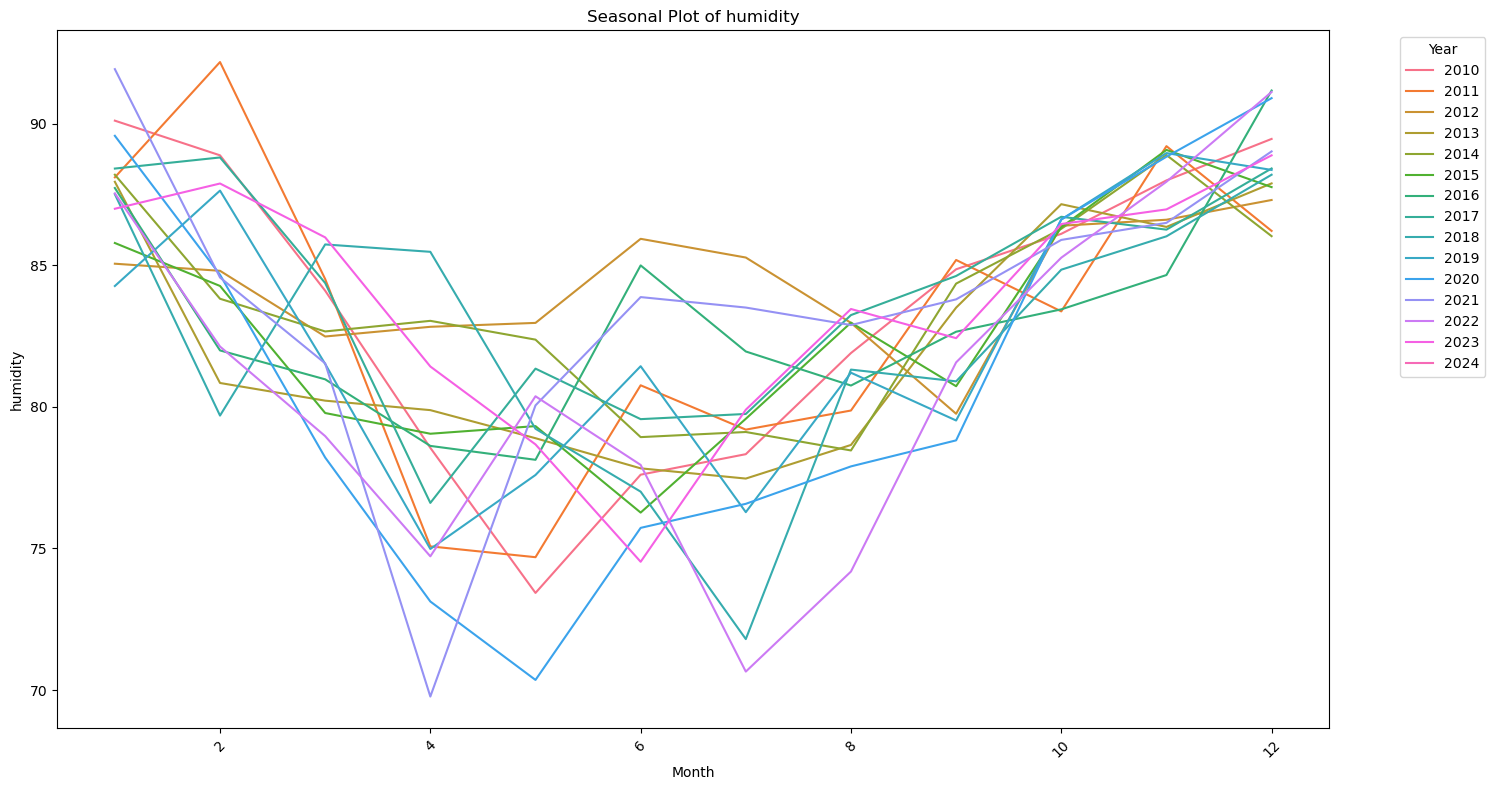

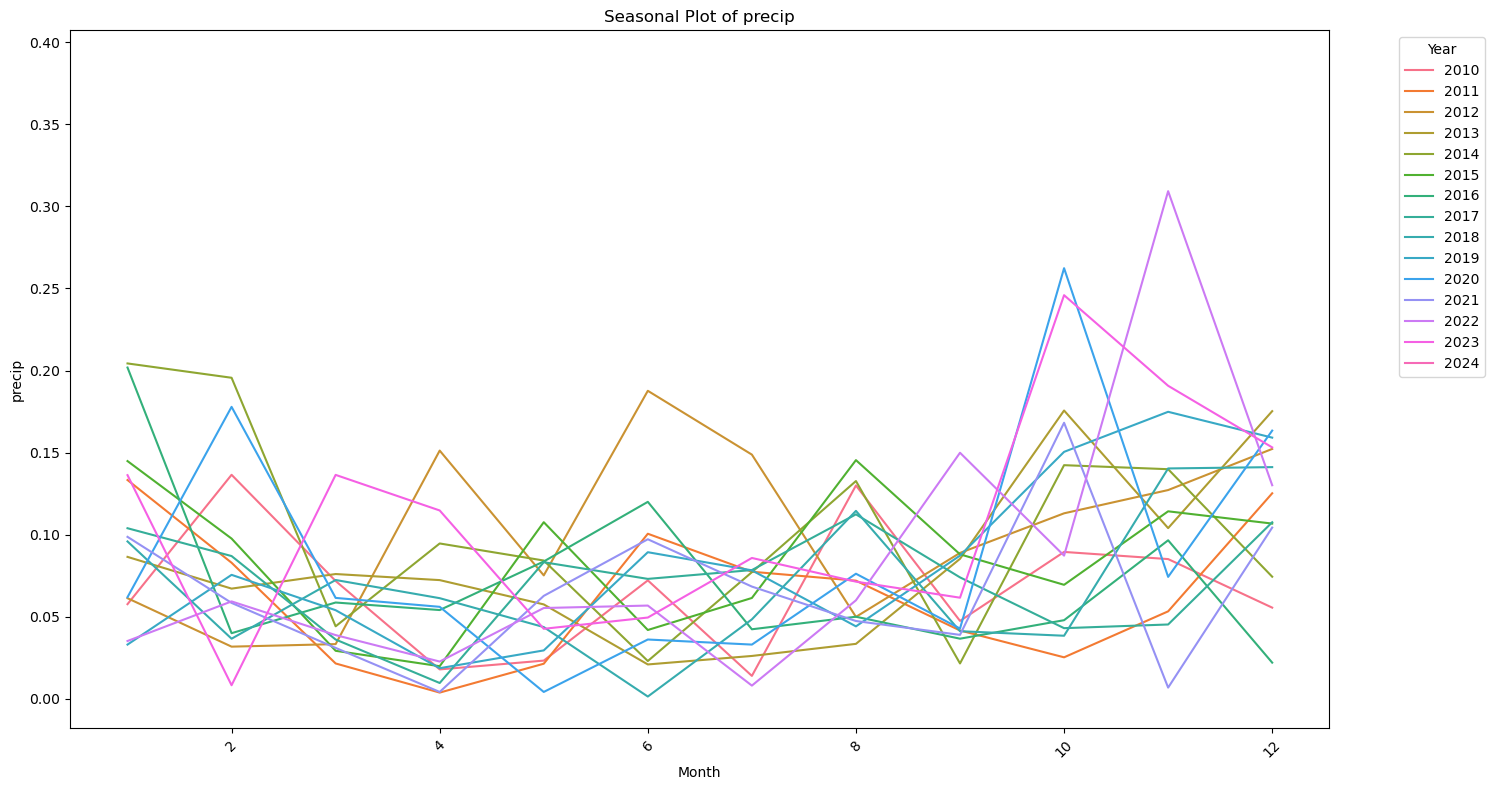

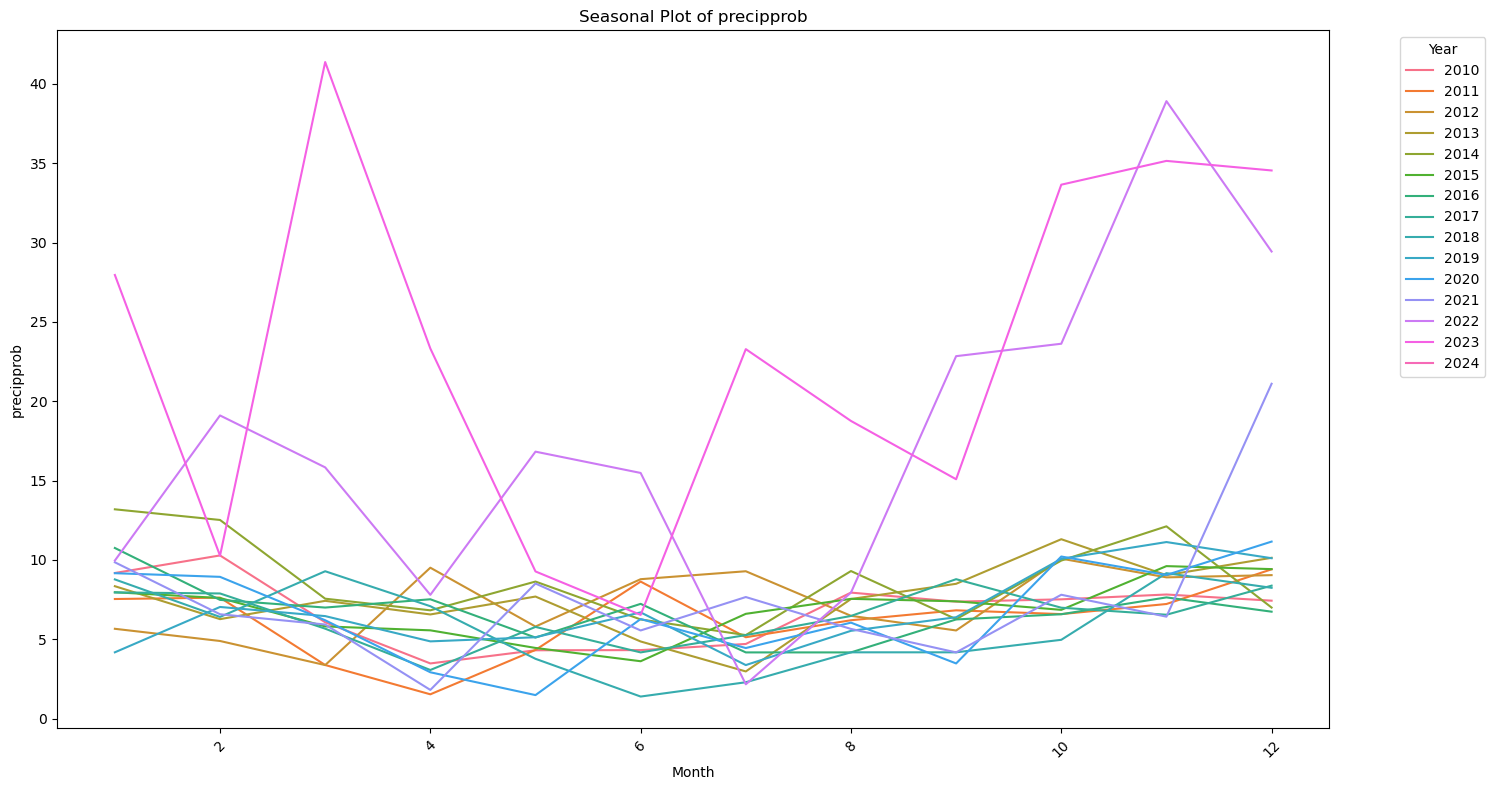

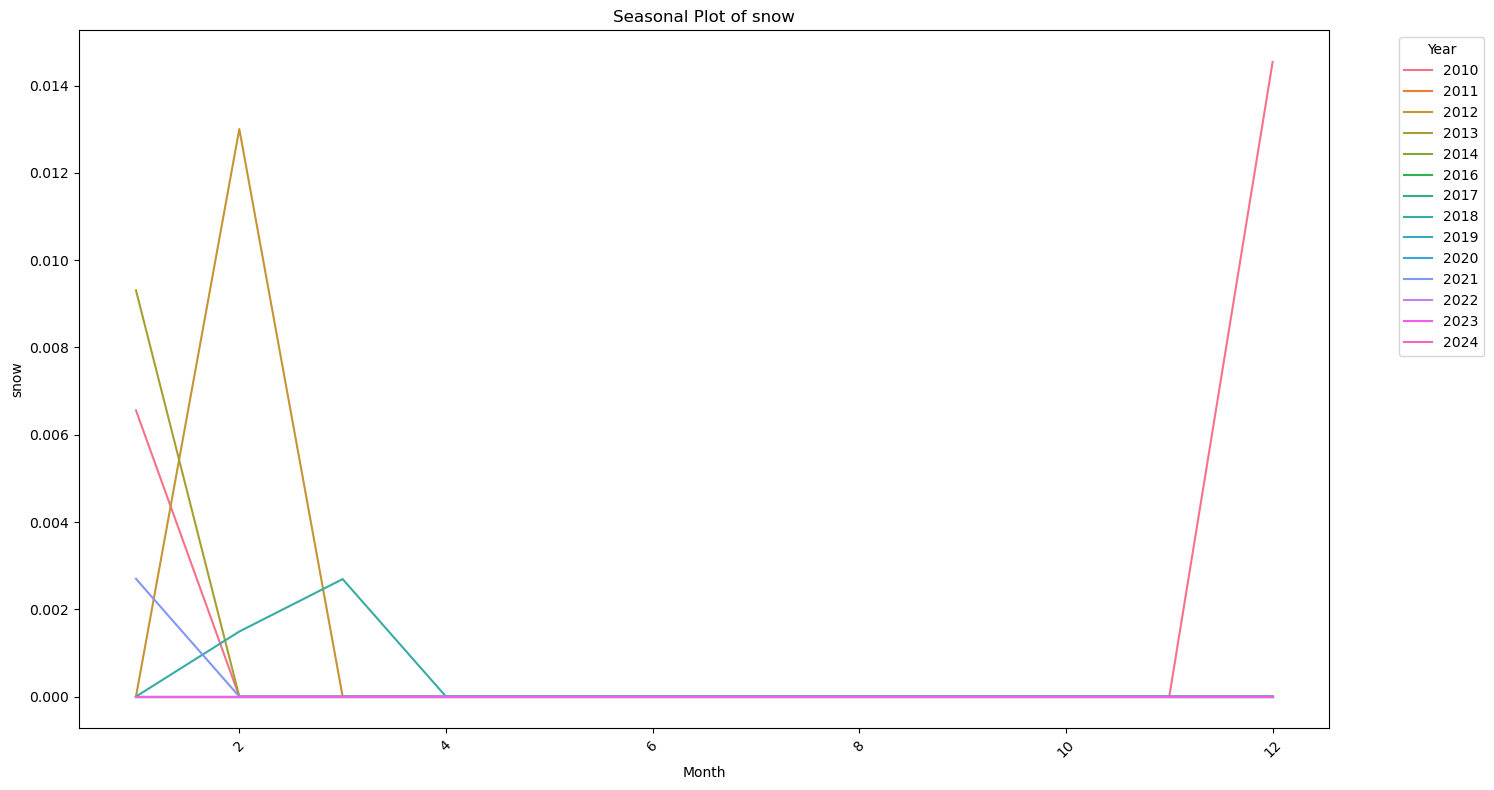

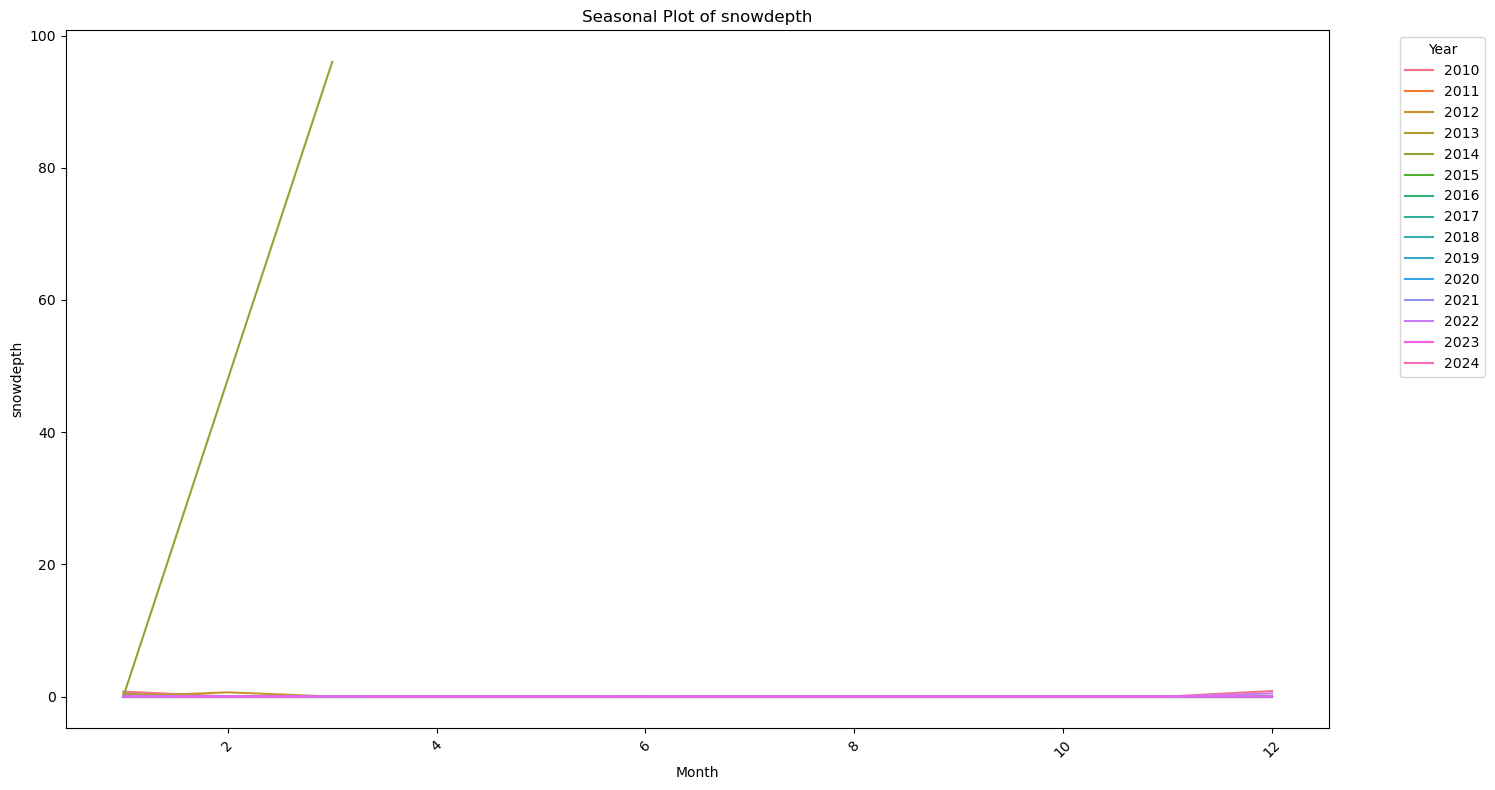

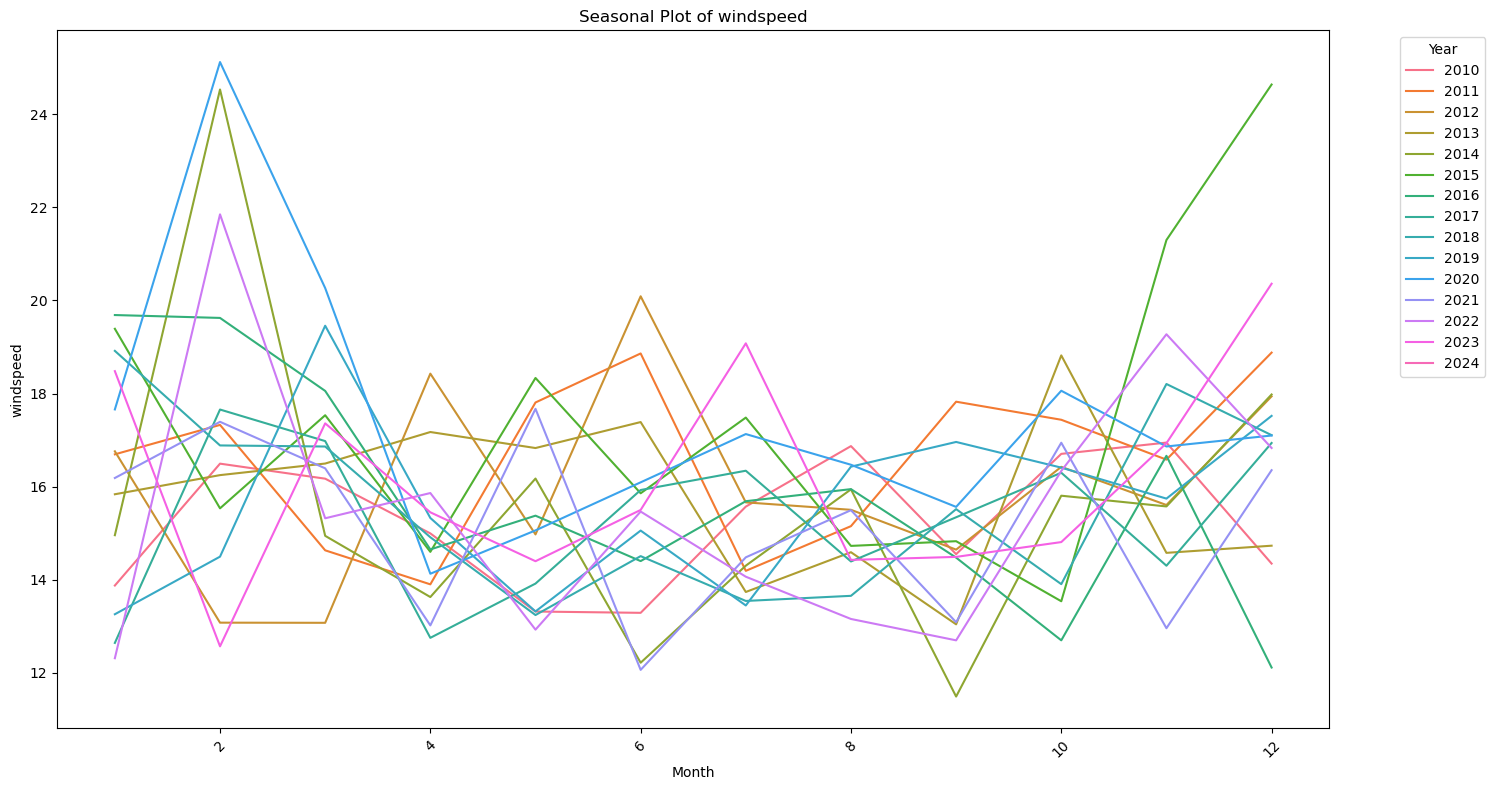

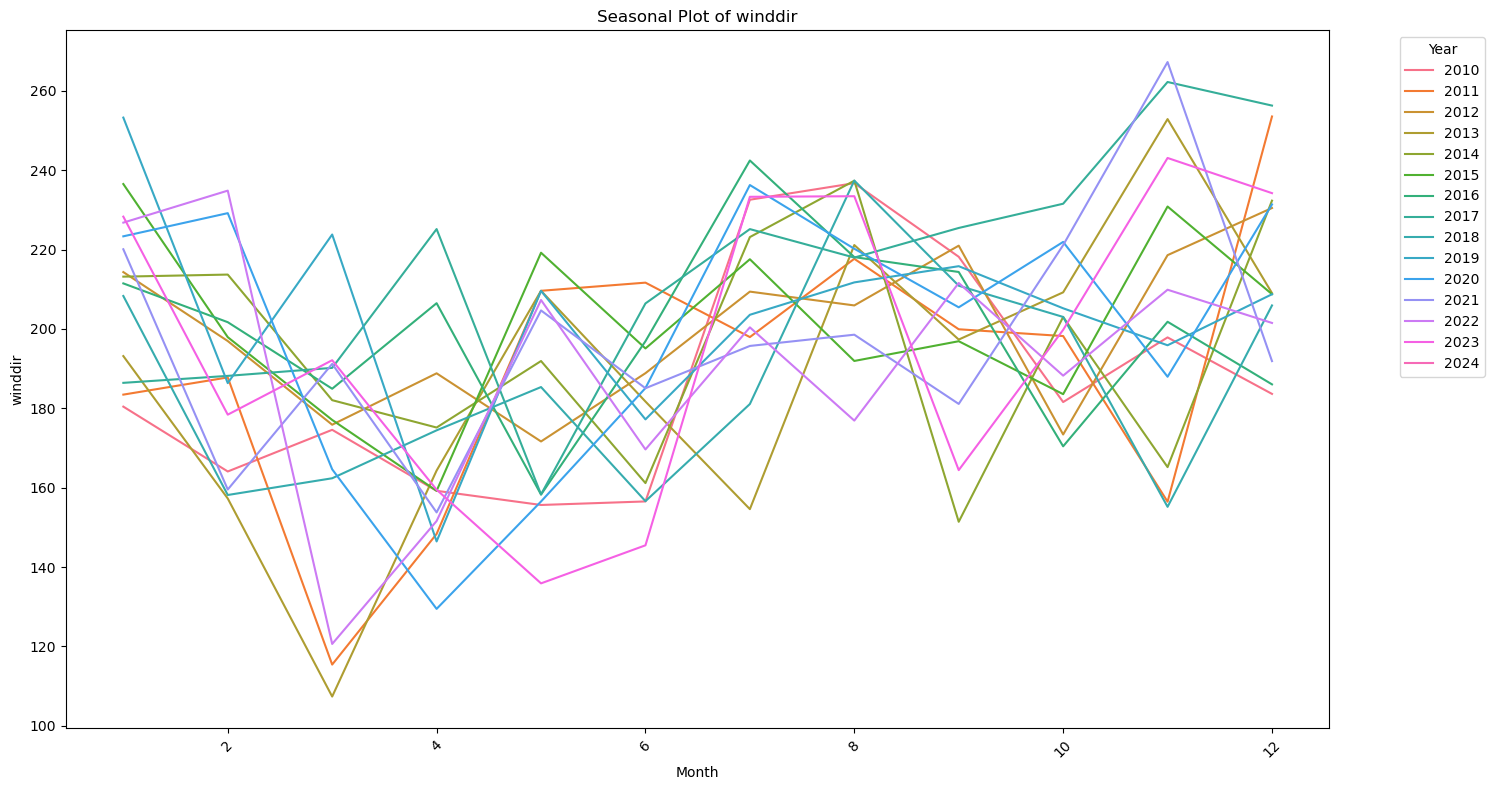

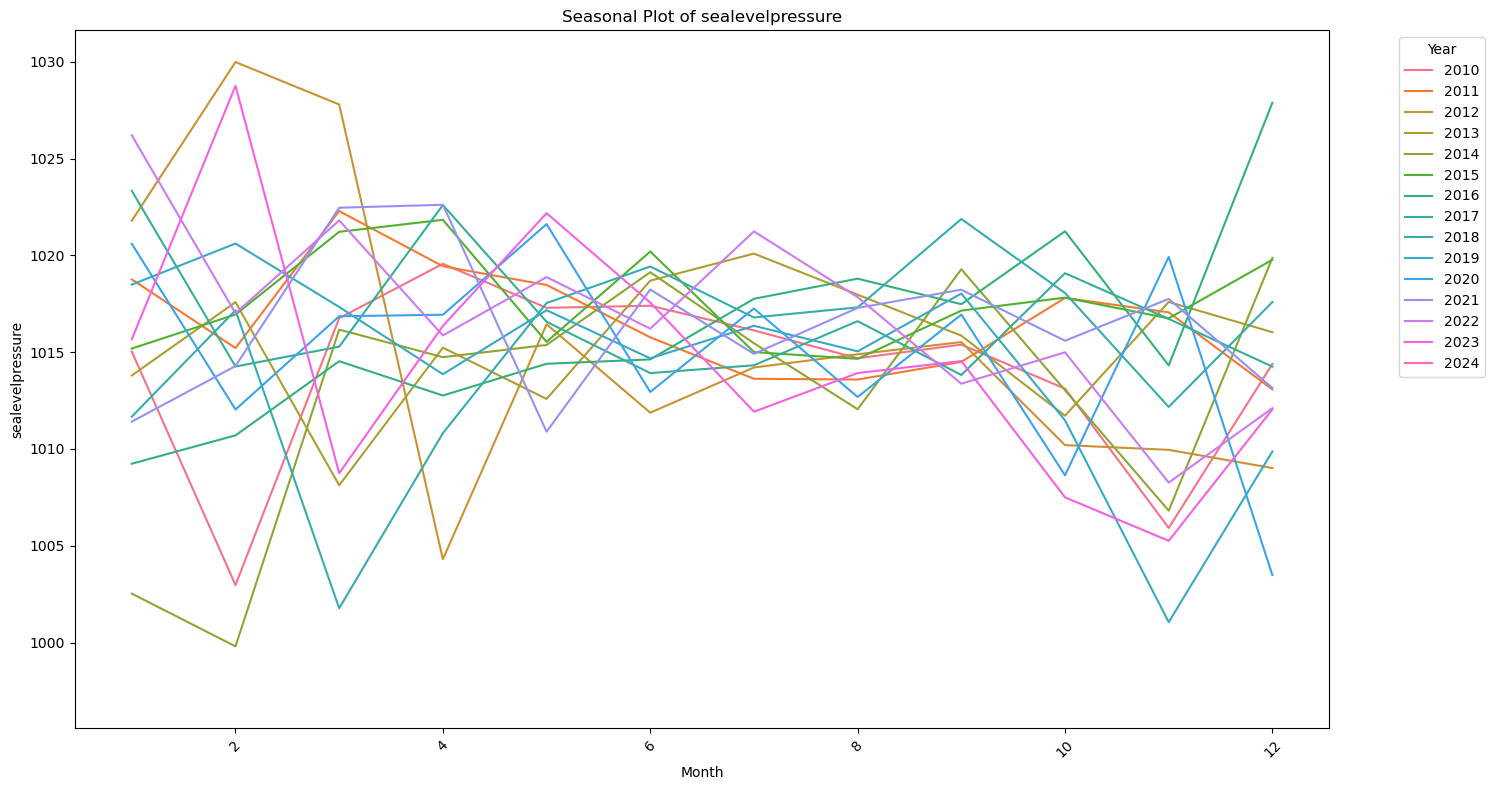

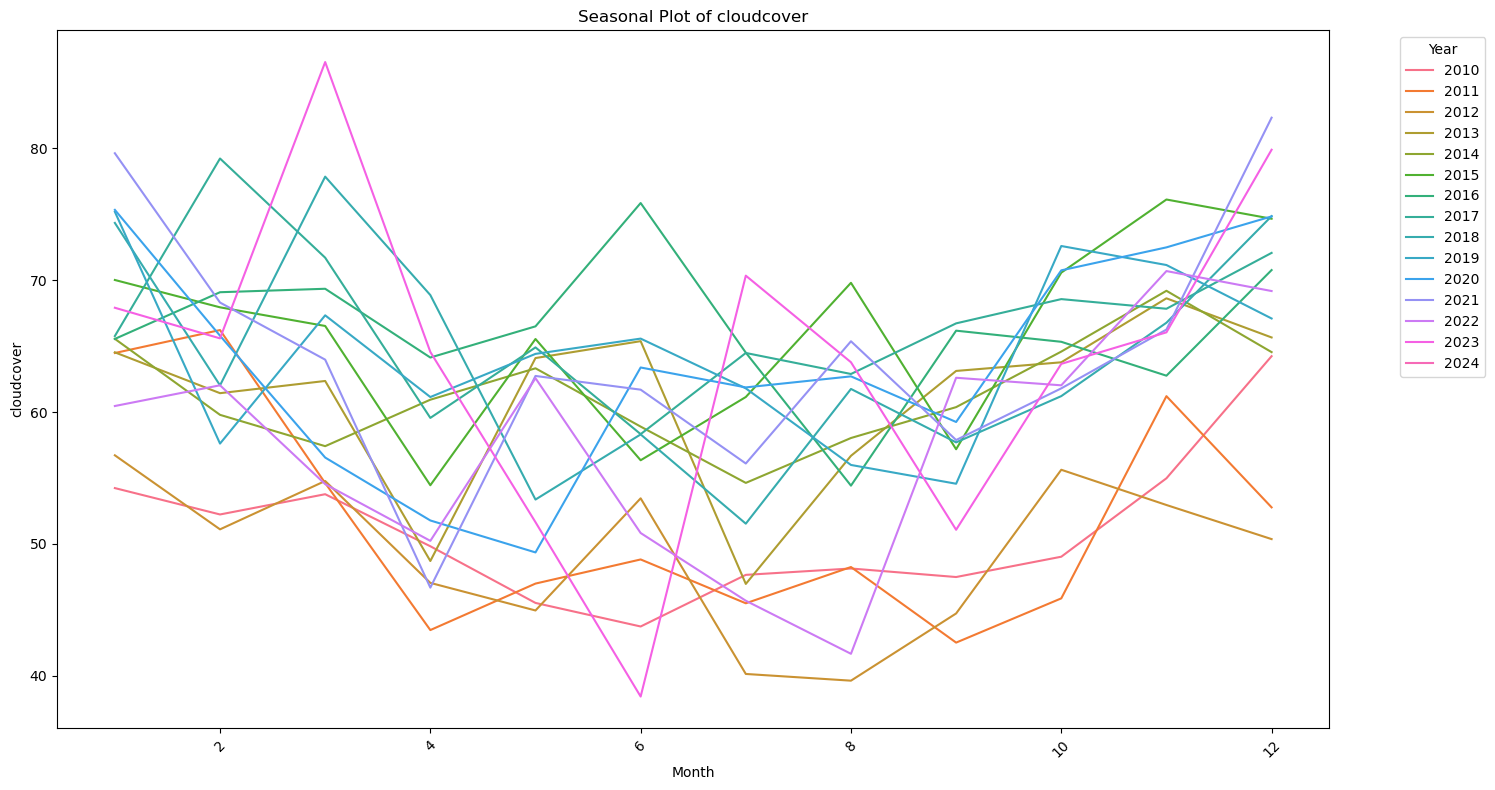

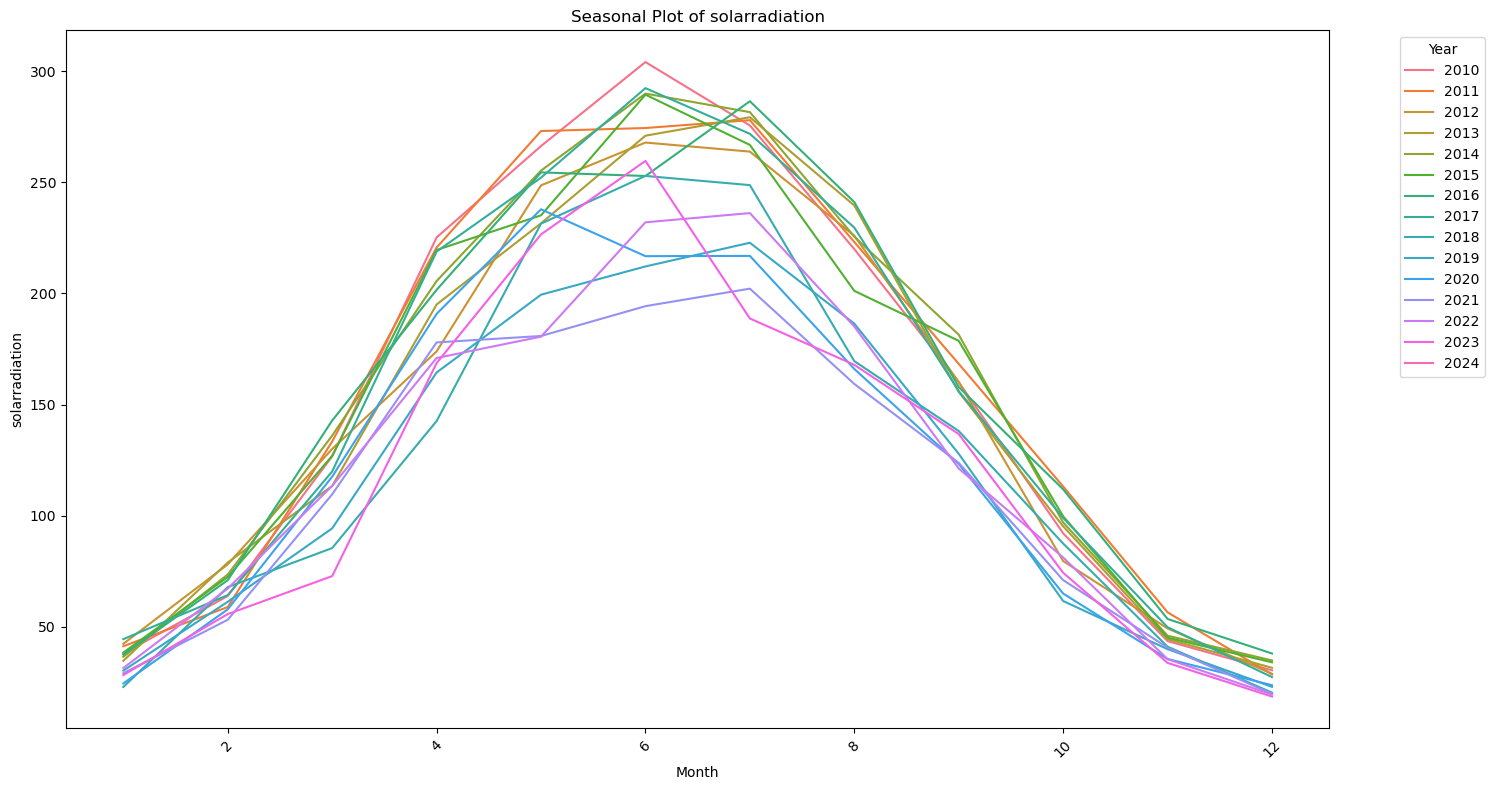

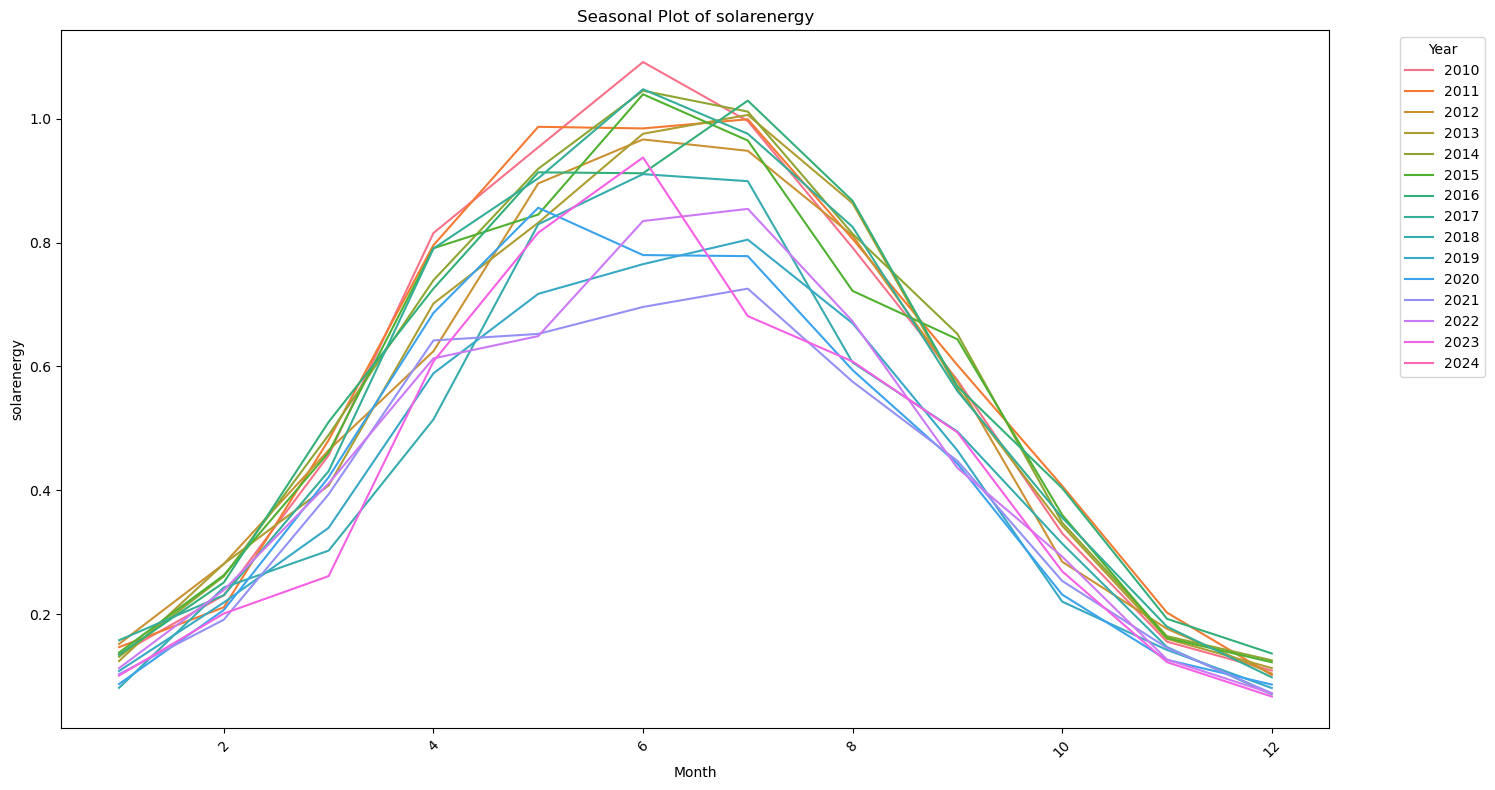

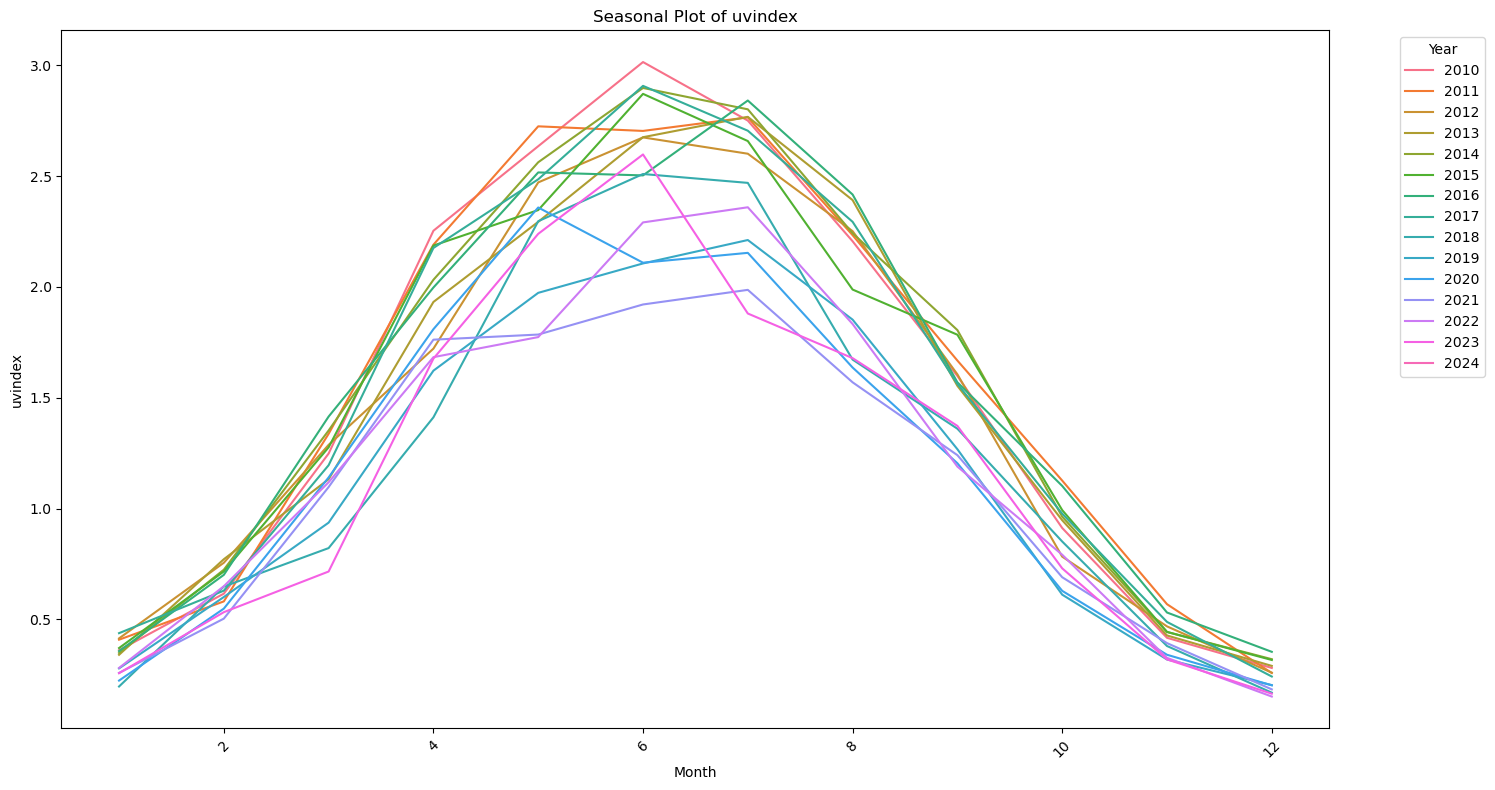

In [10]:
import numpy as np
# Plotting a seasonal plot for each numeric column
for column in numeric_columns:
    if column != 'month':
        # Pivot the data for the seasonal plot
        pivot_table = df.pivot_table(values=column, index='month', columns='year', aggfunc='mean')

        # Now we plot the seasonal plot for the current column
        plt.figure(figsize=(15, 8))
        sns.lineplot(data=pivot_table, dashes=False)
        plt.title(f'Seasonal Plot of {column}')
        plt.xlabel('Month')
        plt.ylabel(column)
        plt.xticks(rotation=45)  # Rotate x labels for better readability
        plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
        plt.show()


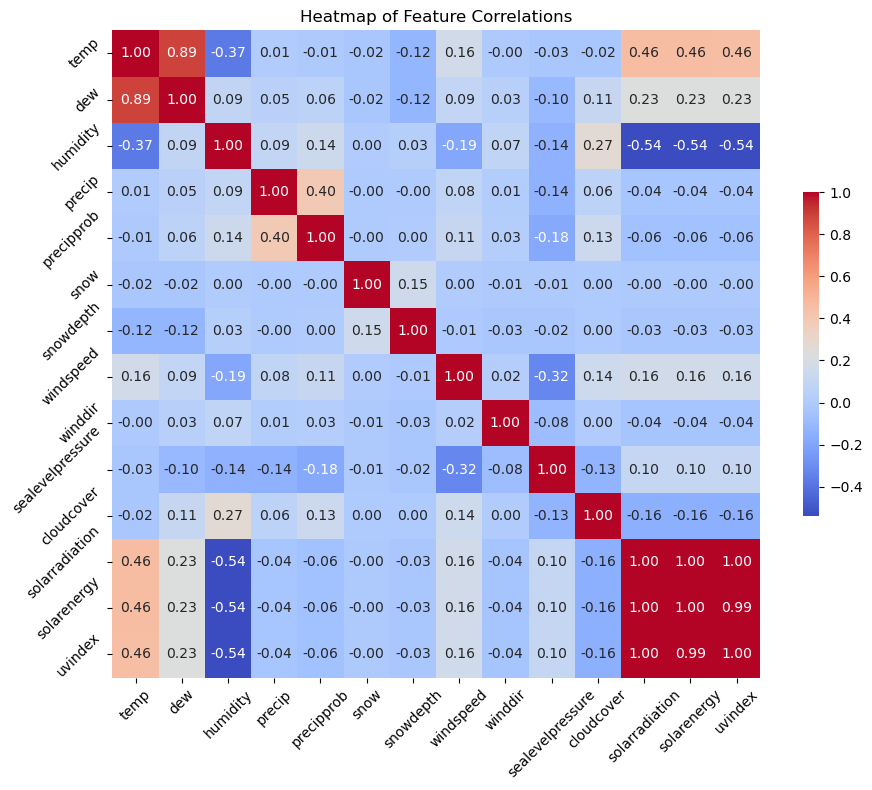

In [11]:
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
